In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

In [3]:
data_frame = pd.read_excel("anz_dataset.xlsx")

In [4]:
data_frame.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
data_frame.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [6]:
salary_trans = data_frame[data_frame['txn_description']=='PAY/SALARY']

In [7]:
salary_trans.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit


In [8]:
male_salary=salary_trans[salary_trans['gender']=='M']
female_salary=salary_trans[salary_trans['gender']=='F']

In [9]:
male_salary.head()


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
92,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,...,26,NaN,NaN,2018-08-01T16:00:00.000+0000,1098.91,00e97a9be9654405bb44f96e748b3ace,Australia,CUS-1646621553,NaN,credit
93,posted,NaN,0,ACC-4059612845,AUD,130.98 -12.49,PAY/SALARY,NaN,0.0,Jonathan,...,38,NaN,NaN,2018-08-01T16:00:00.000+0000,2647.38,794ef124f66645e68d0707ef0a544b50,Australia,CUS-495599312,NaN,credit


In [10]:
female_salary.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit
72,posted,NaN,0,ACC-1598451071,AUD,153.41 -27.95,PAY/SALARY,NaN,0.0,Diana,...,26,NaN,NaN,2018-08-01T14:00:00.000+0000,1013.67,a72c9dd8b4614a1982ff71f8b62677ad,Australia,CUS-2487424745,NaN,credit
90,posted,NaN,0,ACC-3485804958,AUD,138.52 -35.01,PAY/SALARY,NaN,0.0,Jessica,...,34,NaN,NaN,2018-08-01T16:00:00.000+0000,3903.73,cf378669537f46e4acee7321fa8accb1,Australia,CUS-1196156254,NaN,credit
97,posted,NaN,0,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,NaN,0.0,Michele,...,30,NaN,NaN,2018-08-01T17:00:00.000+0000,1158.15,148a346f380948cfa1ee8e5166b56a6e,Australia,CUS-1271030853,NaN,credit


In [11]:
average_male_salary=male_salary['amount'].values.mean()
average_male_salary

2096.811681034483

In [12]:
average_female_salary=female_salary['amount'].values.mean()
average_female_salary

1679.370477326969

In [13]:
((average_male_salary-average_female_salary)/average_female_salary)*100

24.857005011303382

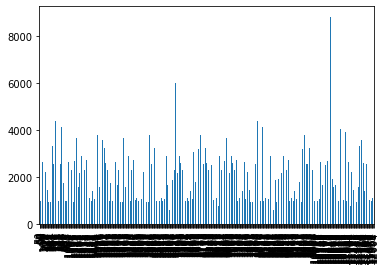

In [14]:
male_salary['amount'].plot(kind='bar')

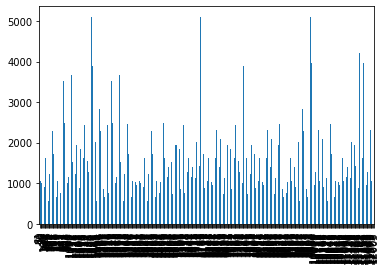

In [15]:
female_salary['amount'].plot(kind='bar')

In [16]:
anz_transactions_pos_pos_sales = data_frame[(data_frame['txn_description']=='POS') | (data_frame['txn_description']=='SALES-POS')]

In [17]:
male_trans=anz_transactions_pos_pos_sales[anz_transactions_pos_pos_sales['gender']=='M']
female_trans=anz_transactions_pos_pos_sales[anz_transactions_pos_pos_sales['gender']=='F']

In [18]:
average_male_trans=male_trans['amount'].values.mean()
average_male_trans

41.22411154345007

In [19]:
average_female_trans=female_trans['amount'].values.mean()
average_female_trans

39.08529259451061

In [20]:
((average_male_trans-average_female_trans)/average_female_trans)*100

5.472183542614309

In [21]:
def group_by_data(data, columns):
    return data.groupby(columns).size().to_frame('count').reset_index()

In [22]:
customers=group_by_data(salary_trans,['first_name','customer_id','gender'])
customers_rank = customers.reset_index(drop=True).sort_values('count', ascending=False)
customers_rank

,first_name,customer_id,gender,count
67,Michele,CUS-1271030853,F,14
91,Susan,CUS-164374203,F,14
49,Kristin,CUS-4123612273,F,14
21,Diana,CUS-2487424745,F,14
57,Marissa,CUS-2500783281,F,14
...,...,...,...,...
51,Linda,CUS-423725039,F,3
83,Ronald,CUS-2178051368,M,2
46,Kimberly,CUS-1739931018,F,2
78,Richard,CUS-51506836,M,2


In [23]:
salary_trans_indi=salary_trans

In [24]:
salary_trans_indi=salary_trans_indi.groupby(['first_name','customer_id','gender'])['amount'].sum().reset_index()
salary_trans_indi.reset_index(drop=True).sort_values('amount', ascending=False)

,first_name,customer_id,gender,amount
94,Tim,CUS-1816693151,M,35343.92
79,Ricky,CUS-3142625864,M,33644.13
45,Kenneth,CUS-2738291516,M,33081.88
50,Linda,CUS-2155701614,F,31762.12
44,Kenneth,CUS-261674136,M,30837.10
...,...,...,...,...
48,Kimberly,CUS-72755508,F,8703.84
26,Emily,CUS-3255104878,F,8637.59
81,Robert,CUS-880898248,M,8603.88
58,Mary,CUS-1654129794,F,7488.00


In [25]:
grouped_data=group_by_data(anz_transactions_pos_pos_sales,['first_name','customer_id','gender'])
top_5_pos_pos_sale_customers = grouped_data.reset_index(drop=True).sort_values('count', ascending=False).head(5)
top_5_pos_pos_sale_customers

,first_name,customer_id,gender,count
21,Diana,CUS-2487424745,F,531
65,Michael,CUS-2142601169,M,276
96,Tonya,CUS-3026014945,F,248
75,Rhonda,CUS-1614226872,F,220
36,Jeffrey,CUS-860700529,M,206


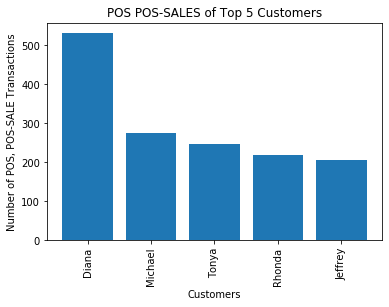

In [26]:
fig, ax = plt.subplots()
ax.bar(top_5_pos_pos_sale_customers['first_name'].values, top_5_pos_pos_sale_customers['count'].values)
ax.set_xlabel('Customers', fontsize=10)
ax.set_ylabel('Number of POS, POS-SALE Transactions', fontsize=10)
ax.set_xticks(top_5_pos_pos_sale_customers['first_name'].values)
ax.set_xticklabels(top_5_pos_pos_sale_customers['first_name'].values, fontsize=10, rotation=90)
ax.set_title('POS POS-SALES of Top 5 Customers')
 # ax.legend(loc='upper right', frameon=True)
plt.show()

In [27]:
anz_transactions_pos_pos_sales_aux=anz_transactions_pos_pos_sales

In [28]:
anz_transactions_pos_pos_sales_aux=anz_transactions_pos_pos_sales_aux.groupby(['first_name','customer_id','gender'])['amount'].sum().reset_index()
anz_transactions_pos_pos_sales_aux.reset_index(drop=True).sort_values('amount', ascending=False)

,first_name,customer_id,gender,amount
21,Diana,CUS-2487424745,F,9819.21
67,Michele,CUS-1271030853,F,9705.68
65,Michael,CUS-2142601169,M,9685.76
40,Joseph,CUS-2695611575,M,7558.12
87,Sandra,CUS-4142663097,F,7192.98
...,...,...,...,...
72,Paul,CUS-3989008654,M,457.87
46,Kimberly,CUS-1739931018,F,312.48
43,Karen,CUS-2630892467,F,124.31
3,Andrew,CUS-1646183815,M,71.21


In [29]:
grouped_by_state=anz_transactions_pos_pos_sales.groupby(['merchant_state'])['amount'].sum().reset_index()
grouped_by_staterank=grouped_by_state.reset_index(drop=True).sort_values('amount', ascending=False)
grouped_by_staterank.head()

,merchant_state,amount
1,NSW,102021.77
6,VIC,87584.00
3,QLD,53483.45
7,WA,33992.06
4,SA,16776.57
